In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
X_test.shape

(10000, 28, 28)

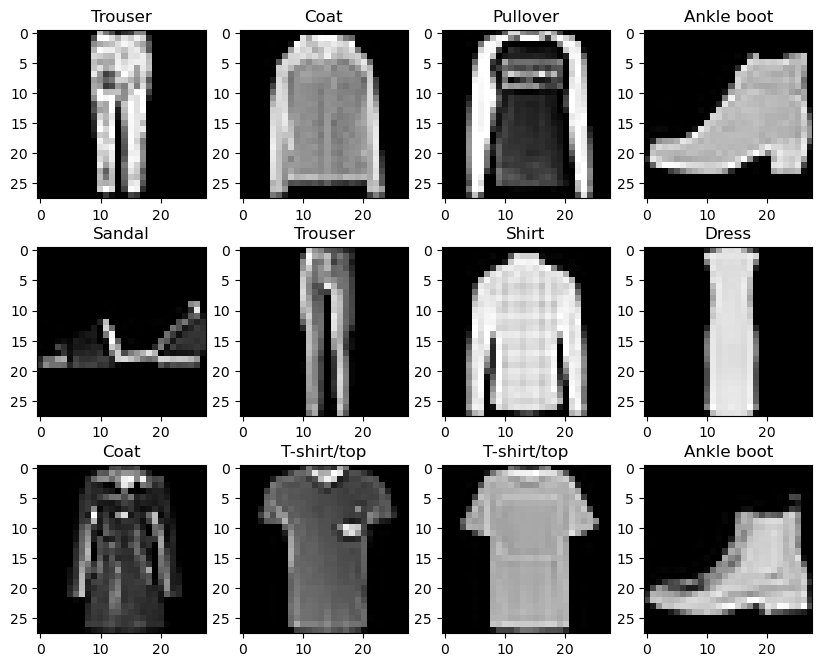

In [7]:
num_classes=10                                                                  # Number of Classes
categories=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

In [8]:
X,Y = np.unique(np.array(y_train), return_counts=True)

In [9]:
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

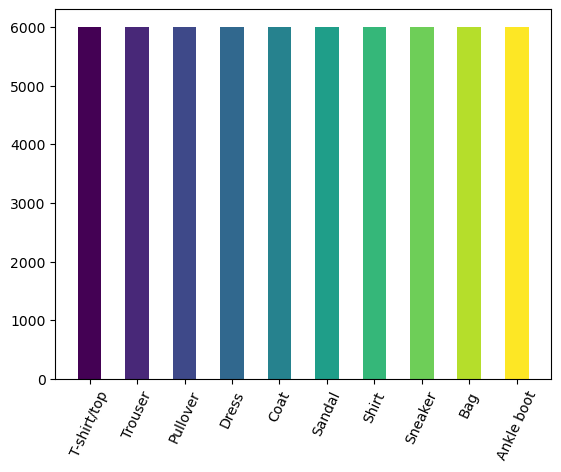

In [10]:
plt.bar(categories,Y,width=0.5, color = my_cmap(rescale(X)))
plt.xticks(rotation = 65)

In [11]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [12]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [13]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [21]:
y_train_encoded.shape

(60000, 10)

In [14]:
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [26]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(128, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 128)       

In [16]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/15
844/844 - 28s - loss: 0.6504 - accuracy: 0.7638 - val_loss: 0.4433 - val_accuracy: 0.8270 - 28s/epoch - 33ms/step
Epoch 2/15
844/844 - 27s - loss: 0.3697 - accuracy: 0.8663 - val_loss: 0.3349 - val_accuracy: 0.8818 - 27s/epoch - 32ms/step
Epoch 3/15
844/844 - 27s - loss: 0.3103 - accuracy: 0.8858 - val_loss: 0.3071 - val_accuracy: 0.8878 - 27s/epoch - 32ms/step
Epoch 4/15
844/844 - 27s - loss: 0.2796 - accuracy: 0.8974 - val_loss: 0.3119 - val_accuracy: 0.8870 - 27s/epoch - 32ms/step
Epoch 5/15
844/844 - 28s - loss: 0.2533 - accuracy: 0.9073 - val_loss: 0.2595 - val_accuracy: 0.9040 - 28s/epoch - 33ms/step
Epoch 6/15
844/844 - 28s - loss: 0.2337 - accuracy: 0.9134 - val_loss: 0.2554 - val_accuracy: 0.9070 - 28s/epoch - 34ms/step
Epoch 7/15
844/844 - 28s - loss: 0.2187 - accuracy: 0.9192 - val_loss: 0.2544 - val_accuracy: 0.9058 - 28s/epoch - 34ms/step
Epoch 8/15
844/844 - 28s - loss: 0.2017 - accuracy: 0.9255 - val_loss: 0.2368 - val_accuracy: 0.9123 - 28s/epoch - 33ms/step


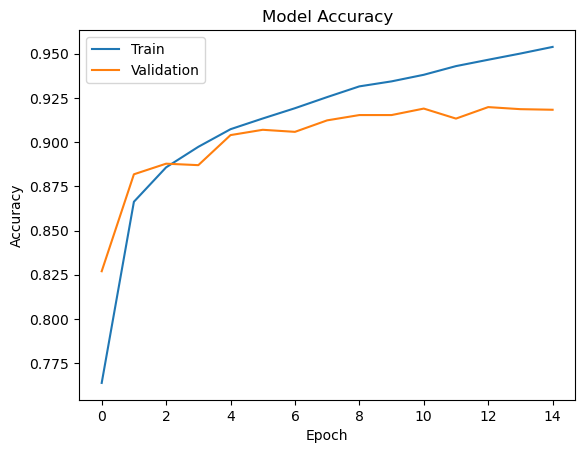

In [17]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 1s - loss: 0.2673 - accuracy: 0.9133 - 1s/epoch - 4ms/step


In [19]:
y_pred=model.predict(X_test_normalized)

313/313 [==============================] - 1s 4ms/step


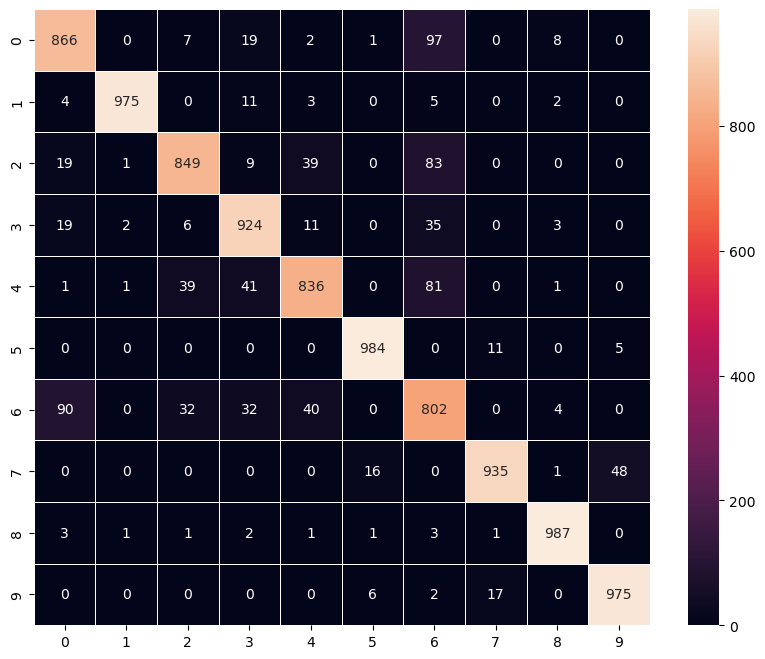

In [20]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [27]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [28]:
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [29]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

#model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
#model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
#model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
______________________________________________

In [30]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=5,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2
)

Epoch 1/5
844/844 - 15s - loss: 0.4208 - accuracy: 0.8524 - val_loss: 0.3019 - val_accuracy: 0.8902 - 15s/epoch - 17ms/step
Epoch 2/5
844/844 - 15s - loss: 0.2776 - accuracy: 0.9003 - val_loss: 0.2707 - val_accuracy: 0.9045 - 15s/epoch - 17ms/step
Epoch 3/5
844/844 - 15s - loss: 0.2358 - accuracy: 0.9140 - val_loss: 0.2744 - val_accuracy: 0.9052 - 15s/epoch - 17ms/step
Epoch 4/5
844/844 - 15s - loss: 0.2053 - accuracy: 0.9253 - val_loss: 0.2592 - val_accuracy: 0.9090 - 15s/epoch - 17ms/step
Epoch 5/5
844/844 - 15s - loss: 0.1803 - accuracy: 0.9345 - val_loss: 0.2484 - val_accuracy: 0.9110 - 15s/epoch - 17ms/step


In [31]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 1s - loss: 0.2676 - accuracy: 0.9078 - 874ms/epoch - 3ms/step


In [33]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_1.add(Conv2D(20, (2, 2), activation='relu', padding="same", input_shape=(32, 32, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

#model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
#model_1.add(MaxPooling2D((2, 2), padding = 'same'))
#model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
#model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
#model_1.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
#model_1.add(Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 20)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 20)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5120)              0         
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________
